In [31]:
import requests
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.style as style
from tabulate import tabulate
from colorama import Fore
from url import team_ranking, batting_ranking, bowling_ranking, all_rounder_ranking

## Inporting data into pickle file
### Each file contains page for respective rankings

In [32]:
team_rank = requests.get(team_ranking)
batting_rank = requests.get(batting_ranking)
bowling_rank = requests.get(bowling_ranking)
allrounder_rank = requests.get(all_rounder_ranking)

with open ('./pkl-file/teamRank.pkl', 'wb') as f:
    pickle.dump(team_rank,f)
with open ('./pkl-file/battingRank.pkl', 'wb') as f:
    pickle.dump(batting_rank,f)
with open ('./pkl-file/bowlingRank.pkl', 'wb') as f:
    pickle.dump(bowling_rank,f)
with open ('./pkl-file/allrounderRank.pkl', 'wb') as f:
    pickle.dump(allrounder_rank,f)

#### Loading the pickle files

In [33]:
with open('./pkl-file/teamRank.pkl', 'rb') as f:
    team_rank = pickle.load(f)
with open('./pkl-file/battingRank.pkl', 'rb') as f:
    batting_rank = pickle.load(f)
with open('./pkl-file/bowlingRank.pkl', 'rb') as f:
    bowling_rank = pickle.load(f)
with open('./pkl-file/allrounderRank.pkl', 'rb') as f:
    allrounder_rank = pickle.load(f)

In [34]:
soup_team_rank = BeautifulSoup(team_rank.text, 'html5lib')
soup_batting_rank = BeautifulSoup(batting_rank.text, 'html5lib')
soup_bowling_rank = BeautifulSoup(bowling_rank.text, 'html5lib')
soup_allrounder_rank = BeautifulSoup(allrounder_rank.text, 'html5lib')


## Data Manipulation
## Work FlowChart
### The data being collected are based on recent and updated rankings, (NOT based on all-time rankings)

Find top 5 teams rn. <br>
Look at top 100 batsmen and seperate top-5-team-wise. --> average the batsmen score for each teams <br>
Look at top 100 bowlers and seperate top-5-team-wise. --> average the bowlers score for each teams <br>
Look at top 20 allrounders and seperate top-5-team-wise. --> average the all rounders score for each teams <br>

- players ranking will give us the ranking of teams based of players individual form/shape currently <br>
- team with most fit and in shape player is likely to win based on those score predict the next match outcome between them. <br>



In [35]:
## Returns array of filtered content 

def filtered(arr):
    f_arr = []
    for a in arr:
        f_arr.append(a.get_text().strip(' \n\t'))
    return f_arr
def filtered_top_five(arr):
    f_arr = []    
    for a in range(5):
        f_arr.append(arr[a].get_text().replace(' \n\t', ""))
    return f_arr

In [36]:
def ranked_nationality(soup):
    top_sport = filtered(soup.find_all('div', {'class': 'rankings-block__banner--nationality'}))
    remaning = filtered(soup.find_all('span', {'class': 'table-body__logo-text'}))
    remaning.insert(0,top_sport[0])
    return (remaning)

def ranked_score(soup):
    top_sport = filtered(soup.find_all('div', {'class': 'rankings-block__banner--rating'}))
    remaning = filtered(soup.find_all('td', {'class': 'table-body__cell rating'}))
    remaning.insert(0,top_sport[0])
    return (remaning)

In [37]:
team_short_name = soup_team_rank.find_all('span', {'class': 'u-show-phablet'})
team_display_name = filtered_top_five(soup_team_rank.find_all('span', {'class': 'u-hide-phablet'}))
top_five_teams_by_short_name = filtered_top_five(team_short_name)

print("Top five teams playing in ODI format are:    ", end="")
for t in range(5):
    print(Fore.RED + team_display_name[t], end="    ")

Top five teams playing in ODI format are:    England    New Zealand    India    Pakistan    Australia    

## Batsmen Average Rankings

In [38]:
ranked_batsmen_nationality = ranked_nationality(soup_batting_rank)
ranked_batsmen_score = ranked_score(soup_batting_rank)

nationality_to_score_tuple_batsmen = list(zip(ranked_batsmen_nationality, ranked_batsmen_score))

In [39]:
## initiate arrays with the name of teams in list top_five_teams_by_short_name
list_of_teams_w_score_batsmen =[]
for t in top_five_teams_by_short_name:
    globals()['%s' % t] = []
    list_of_teams_w_score_batsmen.append(globals()['%s' % t])

In [40]:
# Separate scores from nationality_to_score_tuple to arrays of their respective teams
iteration =0;
for team in top_five_teams_by_short_name:
    for d in nationality_to_score_tuple_batsmen:
        if(team == d[0]):
            list_of_teams_w_score_batsmen[iteration].append(int(d[1])) 
    iteration+=1

In [41]:
# Average batsmen-scores teaam wise 
avg_score_team_based_batting = [(sum(team_score)/len(team_score)) for team_score in list_of_teams_w_score_batsmen]
print(avg_score_team_based_batting)

[679.75, 556.4444444444445, 585.2222222222222, 614.8571428571429, 590.1111111111111]


C:\Users\s538259\AppData\Local\Temp\ipykernel_5028\2890776208.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


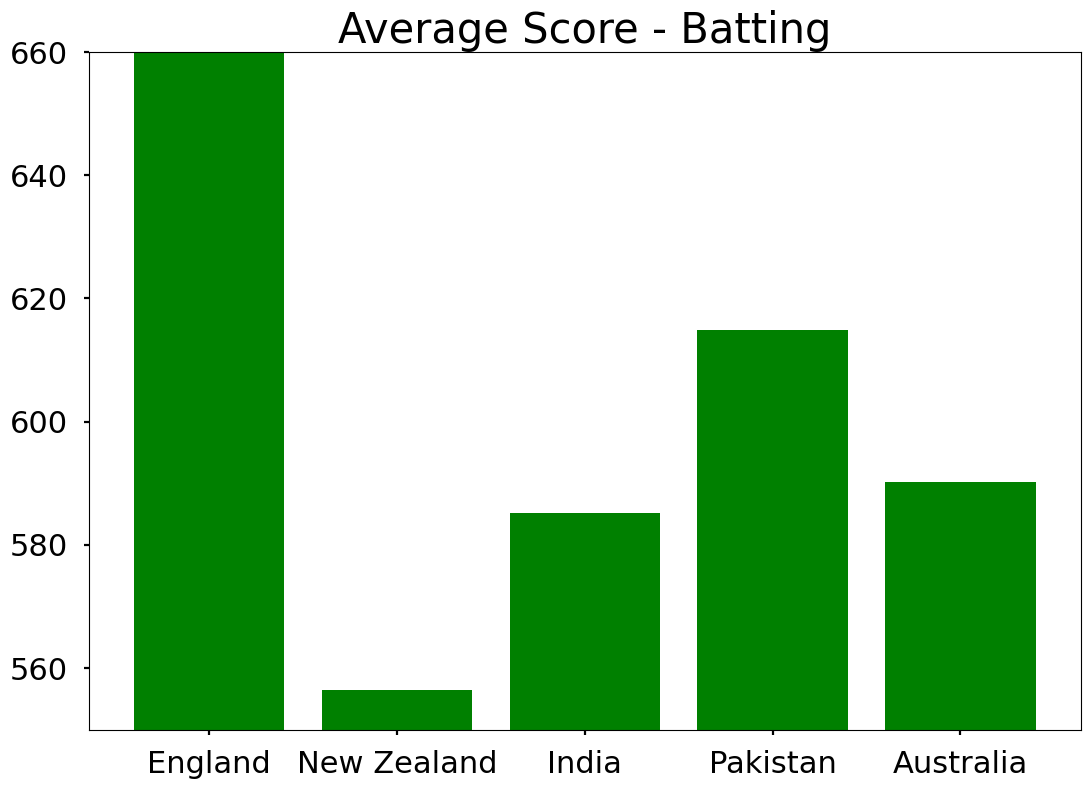

In [42]:

style.use('seaborn-poster')
plt.bar(range(len(avg_score_team_based_batting)), avg_score_team_based_batting, color = 'green')
plt.xticks(range(len(team_display_name)), labels = team_display_name, fontsize =22)
plt.yticks(fontsize = 22)
plt.ylim([550, 660])
plt.title('Average Score - Batting', fontsize = 30)
plt.savefig('./graphs/batting_avg.png', dpi = 'figure', transparent ='true')

## Bowler Average Rankings

In [43]:
ranked_bowler_nationality = ranked_nationality(soup_bowling_rank)
ranked_bowler_score = ranked_score(soup_bowling_rank)

nationality_to_score_tuple_bowler = list(zip(ranked_bowler_nationality, ranked_bowler_score))

In [44]:
## initiate arrays with the name of teams in list top_five_teams_by_short_name
list_of_teams_w_score_bowler =[]
for t in top_five_teams_by_short_name:
    globals()['%s' % t] = []
    list_of_teams_w_score_bowler.append(globals()['%s' % t])

In [45]:
# Separate scores from nationality_to_score_tuple to arrays of their respective teams
iteration =0;
for team in top_five_teams_by_short_name:
    for d in nationality_to_score_tuple_bowler:
        if(team == d[0]):
            list_of_teams_w_score_bowler[iteration].append(int(d[1])) 
    iteration+=1

In [46]:
# Average bowler-scores teaam wise 
avg_score_team_based_bowling = [(sum(team_score)/len(team_score)) for team_score in list_of_teams_w_score_bowler]
print(avg_score_team_based_bowling)

[495.75, 550.125, 506.27272727272725, 487.5, 553.2857142857143]


C:\Users\s538259\AppData\Local\Temp\ipykernel_5028\3561469853.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


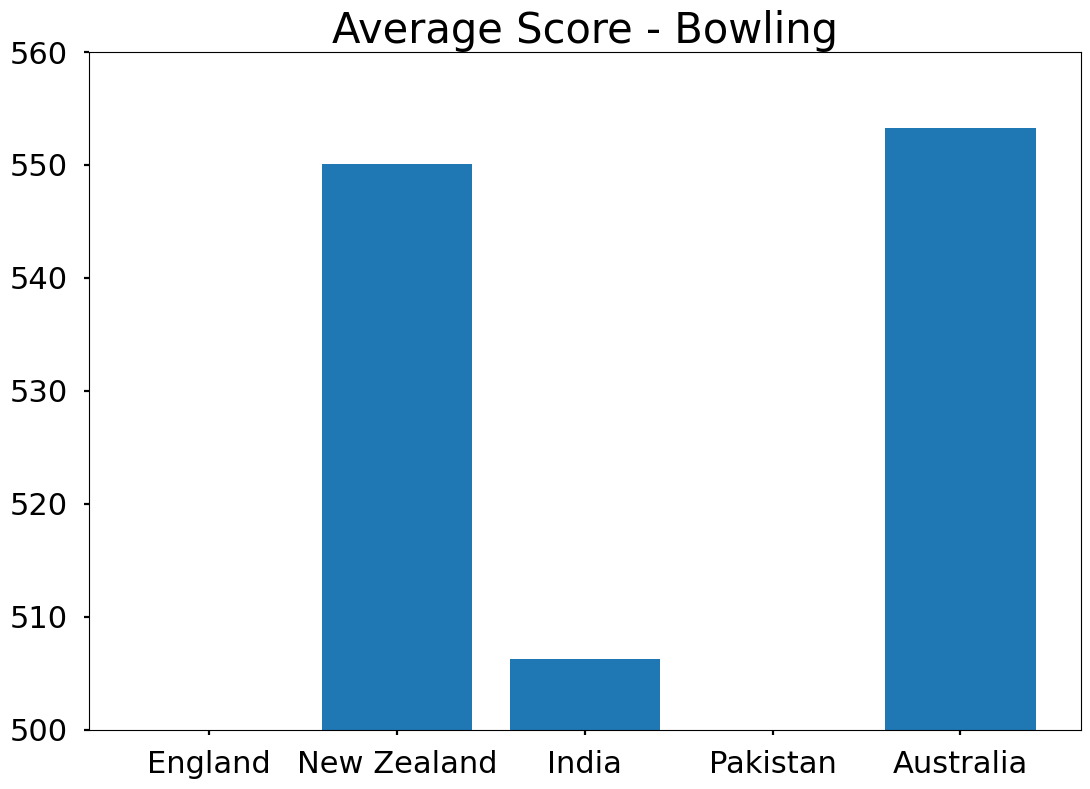

In [47]:
style.use('seaborn-poster')
plt.bar(range(len(avg_score_team_based_bowling)), avg_score_team_based_bowling)
plt.xticks(range(len(team_display_name)), labels = team_display_name, fontsize =22)
plt.yticks(fontsize = 22)
plt.ylim([500, 560])
plt.title('Average Score - Bowling', fontsize = 30)
plt.savefig('./graphs/bowling_avg.png', dpi = 'figure', transparent ='true')

## All-Rounder Average Ranking

In [48]:
ranked_allrounder_nationality = ranked_nationality(soup_allrounder_rank)
ranked_allrounder_score = ranked_score(soup_allrounder_rank)

nationality_to_score_tuple_allrounder = list(zip(ranked_allrounder_nationality, ranked_allrounder_score))

In [49]:
## initiate arrays with the name of teams in list top_five_teams_by_short_name
list_of_teams_w_score_allrounder =[]
for t in top_five_teams_by_short_name:
    globals()['%s' % t] = []
    list_of_teams_w_score_allrounder.append(globals()['%s' % t])

In [50]:
# Separate scores from nationality_to_score_tuple to arrays of their respective teams
iteration =0;
for team in top_five_teams_by_short_name:
    for d in nationality_to_score_tuple_allrounder:
        if(team == d[0]):
            list_of_teams_w_score_allrounder[iteration].append(int(d[1])) 
    iteration+=1

In [51]:
# Average bowler-scores teaam wise 
avg_score_team_based_allrounder = [(sum(team_score)/len(team_score)) for team_score in list_of_teams_w_score_allrounder]
print(avg_score_team_based_allrounder)

[235.0, 229.66666666666666, 202.0, 218.5, 219.0]


C:\Users\s538259\AppData\Local\Temp\ipykernel_5028\2149298048.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


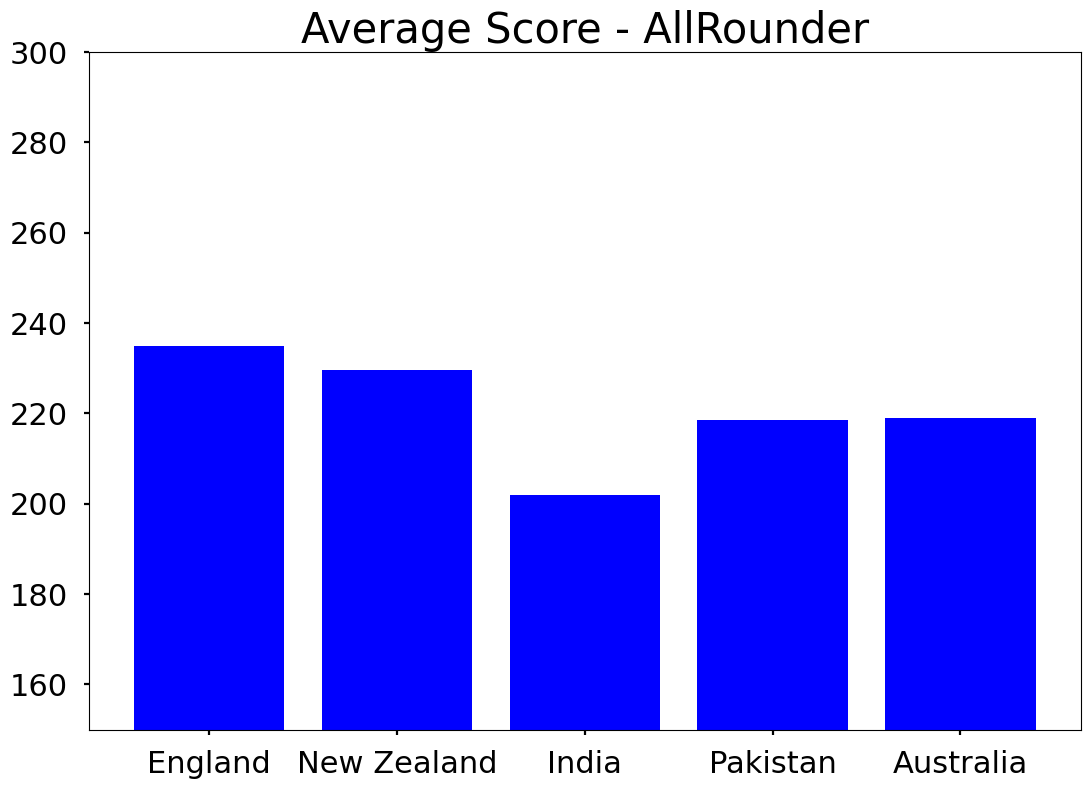

In [52]:
style.use('seaborn-poster')
plt.bar(range(len(avg_score_team_based_allrounder)), avg_score_team_based_allrounder, color = 'blue')
plt.xticks(range(len(team_display_name)), labels = team_display_name, fontsize =22)
plt.yticks(fontsize = 22)
plt.ylim([150, 300])
plt.title('Average Score - AllRounder', fontsize = 30)
plt.savefig('./graphs/allrounder_avg.png', dpi = 'figure', transparent ='true')

In [53]:
avg_fnl = []
for i in range(len(avg_score_team_based_batting)):
    a = avg_score_team_based_batting[i] + avg_score_team_based_bowling[i] + avg_score_team_based_allrounder[i]
    avg_fnl.append(float(('{:.3f}'.format(a/3))))

In [54]:
print(avg_fnl)

[470.167, 445.412, 431.165, 440.286, 454.132]


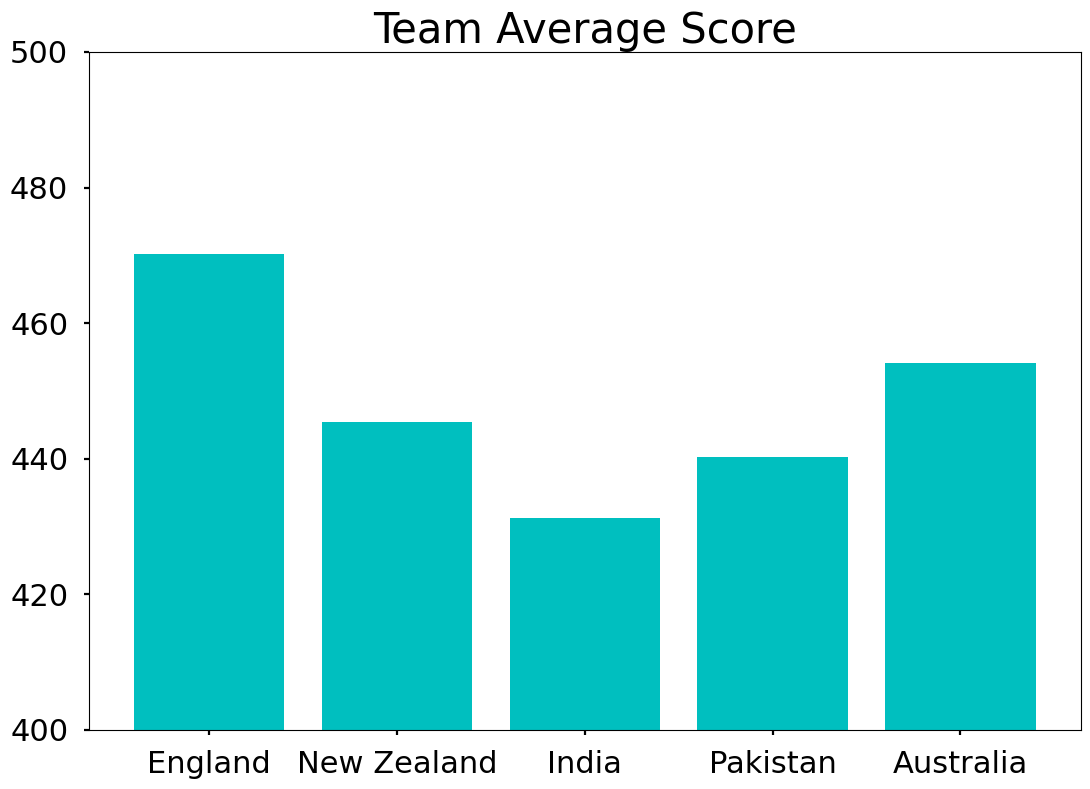

In [55]:

plt.bar(range(len(avg_fnl)), avg_fnl, color = 'c')
plt.xticks(range(len(team_display_name)), labels = team_display_name, fontsize =22)
plt.yticks(fontsize = 22)
plt.title('Team Average Score', fontsize = 30)
plt.ylim([400, 500])
plt.savefig('./graphs/team_avg.png', dpi = 'figure')

In [56]:
final_result_list = list(zip(team_display_name, avg_fnl)) 

#sorting based on scores
final_result_list.sort(key = lambda x:x[1], reverse = True)
print(final_result_list)

[('England', 470.167), ('Australia', 454.132), ('New Zealand', 445.412), ('Pakistan', 440.286), ('India', 431.165)]





## Prediction:
## If this top 5 teams are to be put in a same group and have matches played between them, following result is predicted as per processed data

In [57]:
head = ["Team", "Score"]
print(tabulate(final_result_list, headers=head, tablefmt="fancy_grid"))

╒═════════════╤═════════╕
│ Team        │   Score │
╞═════════════╪═════════╡
│ England     │ 470.167 │
├─────────────┼─────────┤
│ Australia   │ 454.132 │
├─────────────┼─────────┤
│ New Zealand │ 445.412 │
├─────────────┼─────────┤
│ Pakistan    │ 440.286 │
├─────────────┼─────────┤
│ India       │ 431.165 │
╘═════════════╧═════════╛


In [58]:
with open('./tables/scoreTable.txt', 'w') as o:
    o.write(tabulate(final_result_list, headers=head, tablefmt = "grid"))